In [1]:
## import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas as pd
import sklearn
import statsmodels
import warnings
import numpy as np
warnings.filterwarnings('ignore')

dataset_filepath = './ex4/005930.KS (1).csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

print(ts)






Date
2016-09-30    31960.0
2016-10-04    32280.0
2016-10-05    32380.0
2016-10-06    33820.0
2016-10-07    34120.0
               ...   
2022-09-26    53900.0
2022-09-27    54200.0
2022-09-28    52900.0
2022-09-29    52600.0
2022-09-30    53100.0
Name: Close, Length: 1473, dtype: float64


In [2]:
ts = ts.interpolate(method='time')
ts[ts.isna()] 

ts_log = np.log(ts)

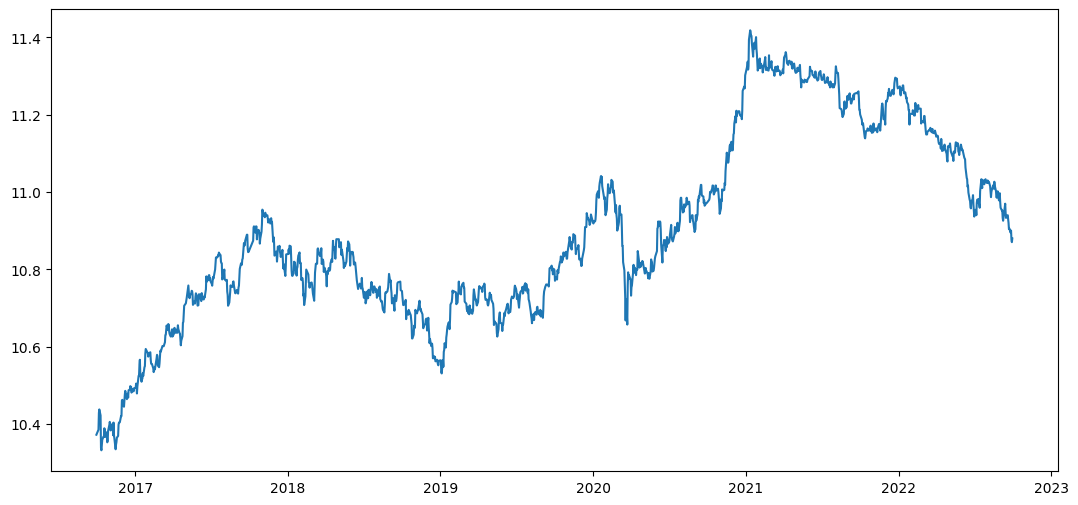

In [3]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6 
plt.plot(ts_log)

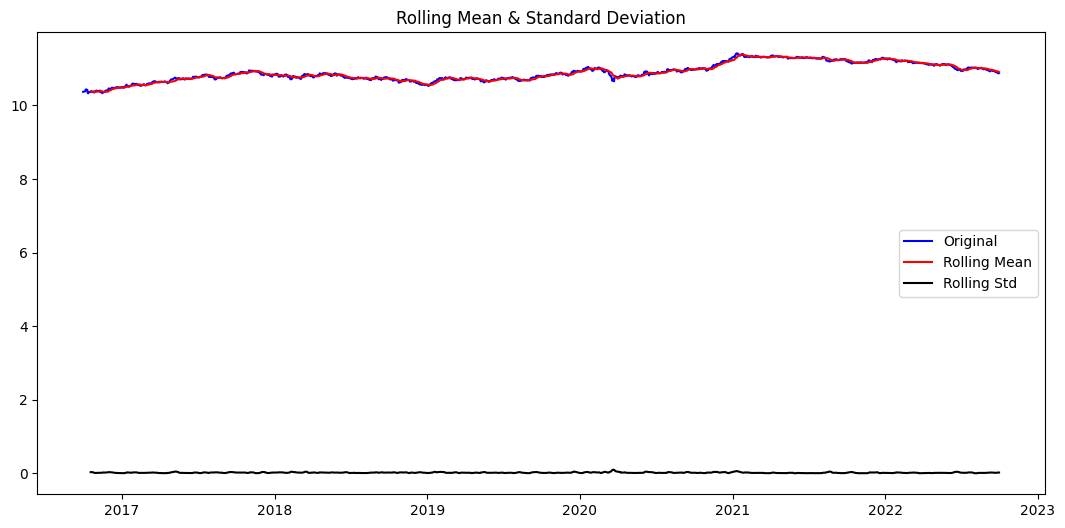

In [4]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
plot_rolling_statistics(ts_log, window=12)

In [5]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -2.177160
p-value                           0.214639
#Lags Used                        0.000000
Number of Observations Used    1472.000000
Critical Value (1%)              -3.434800
Critical Value (5%)              -2.863505
Critical Value (10%)             -2.567816
dtype: float64


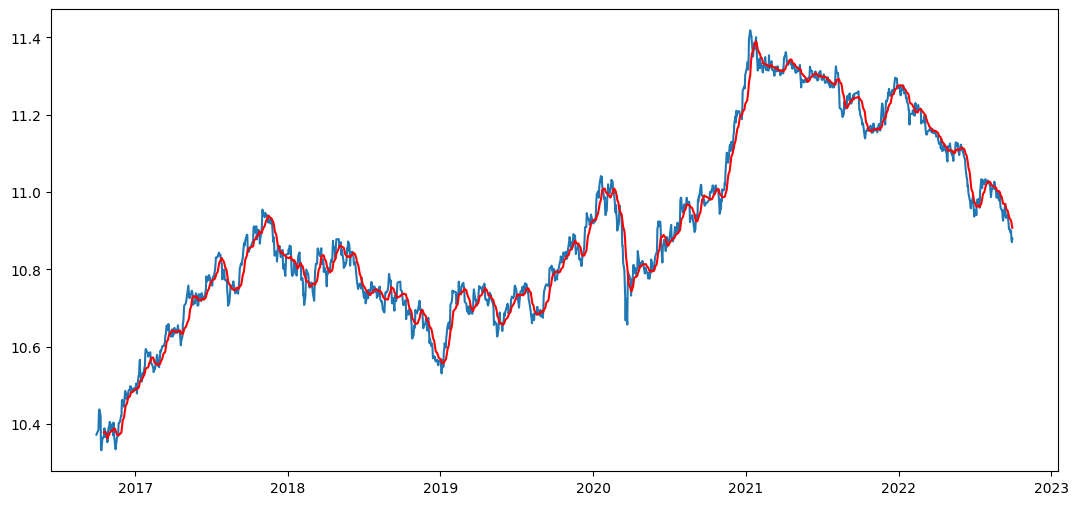

In [6]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


In [7]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Date
2016-09-30         NaN
2016-10-04         NaN
2016-10-05         NaN
2016-10-06         NaN
2016-10-07         NaN
2016-10-10         NaN
2016-10-11         NaN
2016-10-12         NaN
2016-10-13         NaN
2016-10-14         NaN
2016-10-17         NaN
2016-10-18   -0.011580
2016-10-19    0.009427
2016-10-20    0.006036
2016-10-21   -0.011727
Name: Close, dtype: float64

In [8]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2016-10-18   -0.011580
2016-10-19    0.009427
2016-10-20    0.006036
2016-10-21   -0.011727
2016-10-24    0.004353
2016-10-25    0.002991
2016-10-26   -0.010170
2016-10-27   -0.007845
2016-10-28    0.013704
2016-10-31    0.024797
2016-11-01    0.028826
2016-11-02    0.020630
2016-11-03    0.002656
2016-11-04    0.009338
2016-11-07    0.016274
Name: Close, dtype: float64

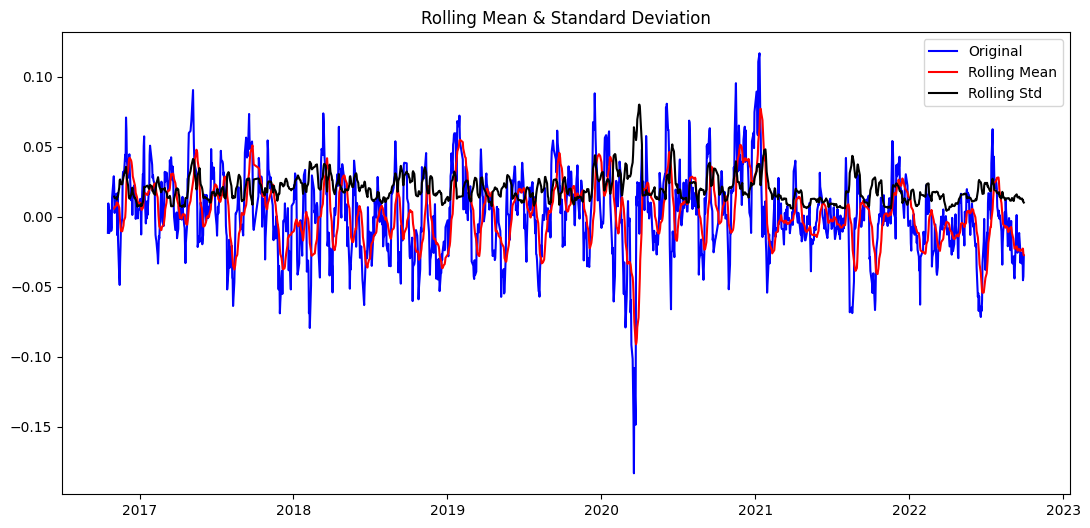

In [9]:
plot_rolling_statistics(ts_log_moving_avg)

In [10]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                -8.218363e+00
p-value                        6.530552e-13
#Lags Used                     1.700000e+01
Number of Observations Used    1.444000e+03
Critical Value (1%)           -3.434887e+00
Critical Value (5%)           -2.863544e+00
Critical Value (10%)          -2.567837e+00
dtype: float64


# p 값이 0.05보다 작음을 확인

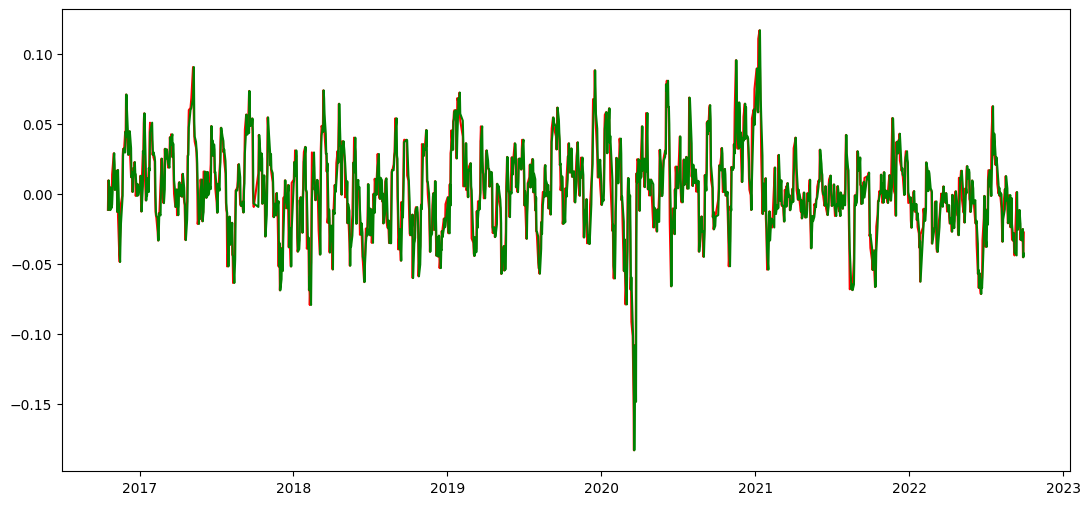

In [11]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='red')
plt.plot(ts_log_moving_avg_shift, color='green')

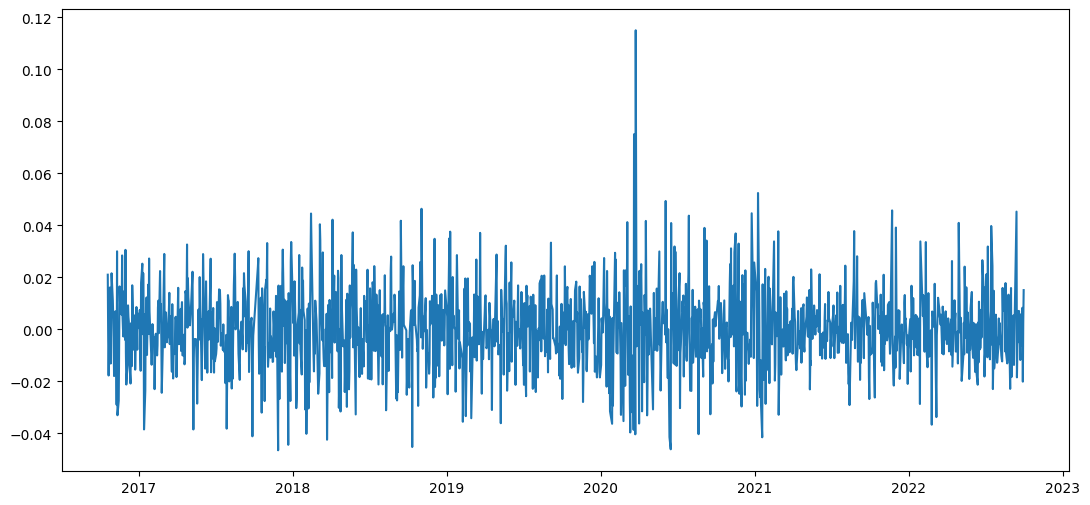

In [12]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

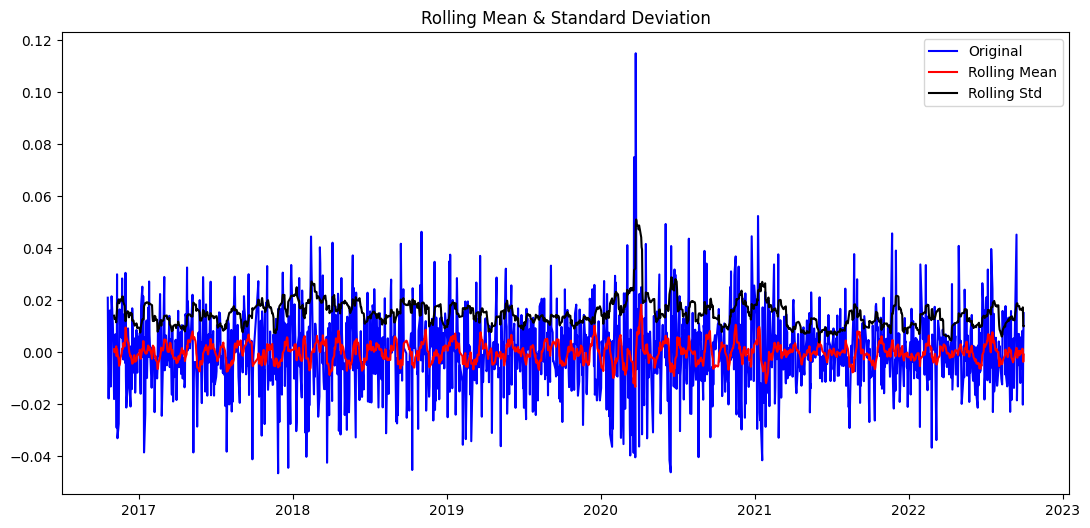

In [13]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [14]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.159121e+01
p-value                        2.789032e-21
#Lags Used                     2.400000e+01
Number of Observations Used    1.436000e+03
Critical Value (1%)           -3.434912e+00
Critical Value (5%)           -2.863555e+00
Critical Value (10%)          -2.567843e+00
dtype: float64


# trend를 제거해주니 p값이 더 내려간 모습

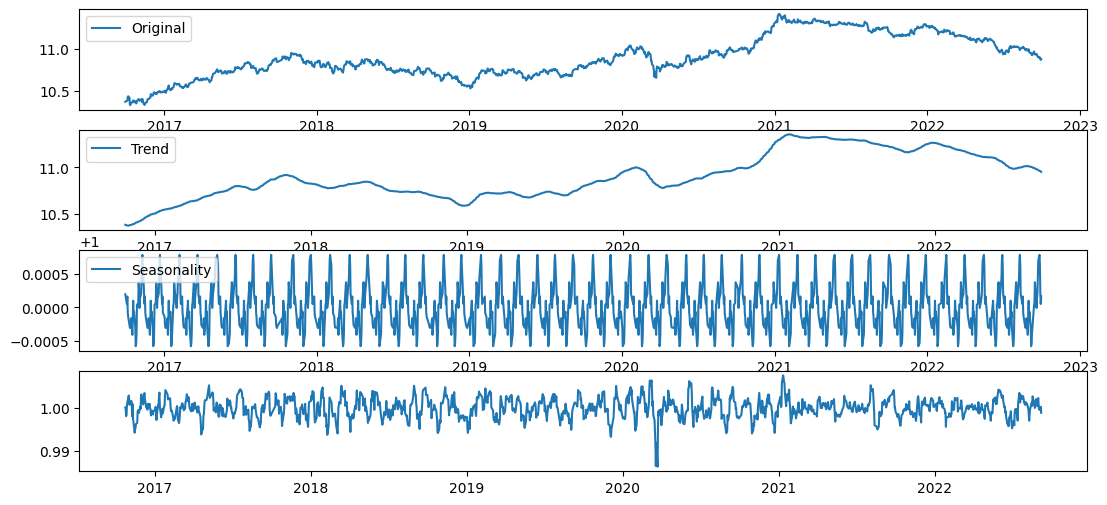

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')

In [16]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.119920e+01
p-value                        2.266077e-20
#Lags Used                     2.300000e+01
Number of Observations Used    1.419000e+03
Critical Value (1%)           -3.434967e+00
Critical Value (5%)           -2.863579e+00
Critical Value (10%)          -2.567856e+00
dtype: float64


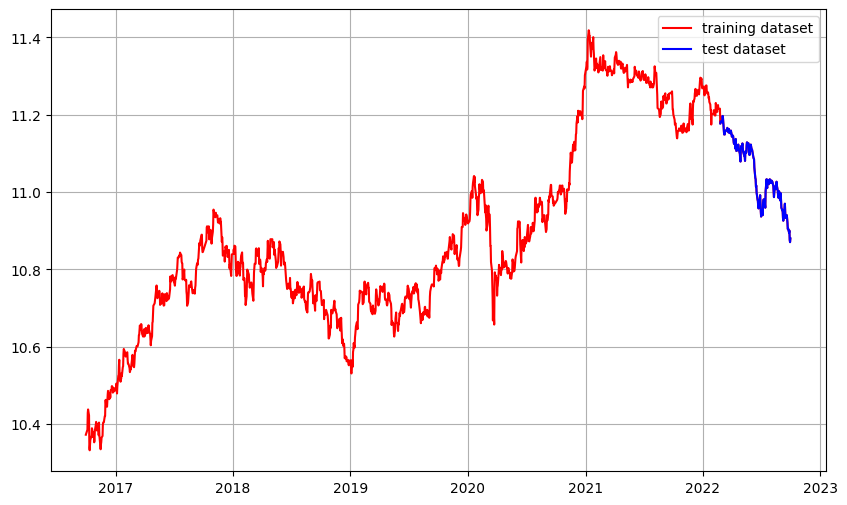

In [17]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

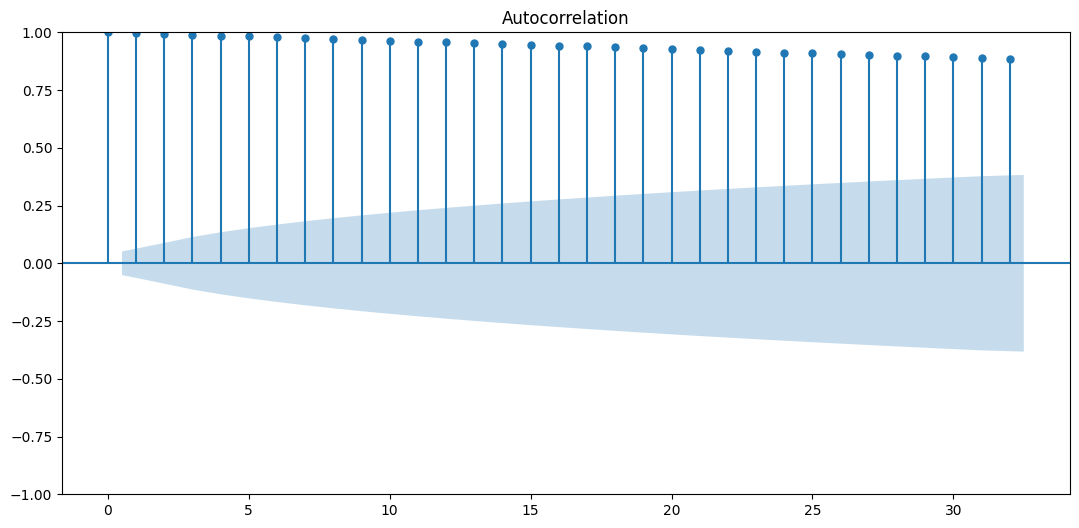

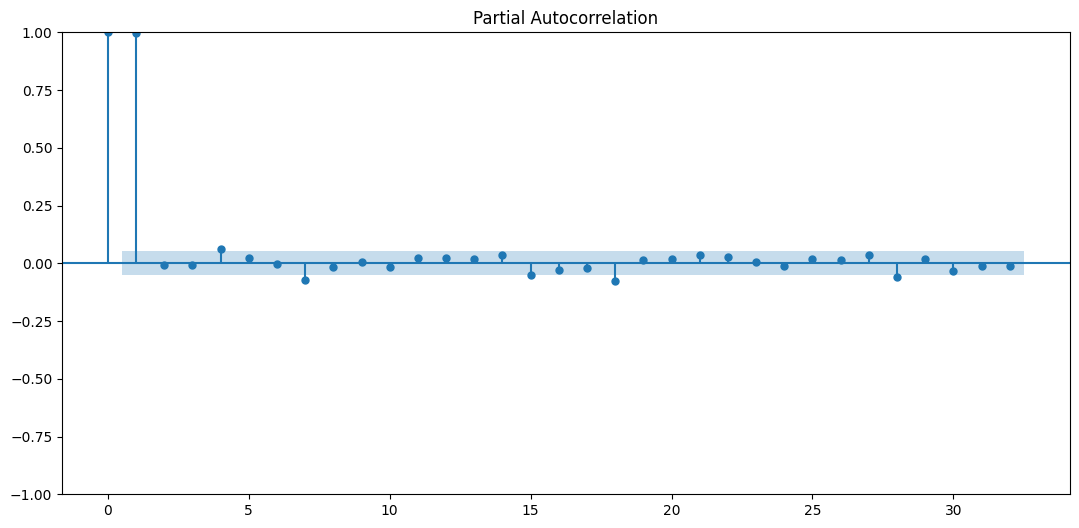

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# pacf 에서 p=1 이 적합하므로, q의값을 0으로 설정한다

Results of Dickey-Fuller Test:
Test Statistic                  -37.523984
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1471.000000
Critical Value (1%)              -3.434803
Critical Value (5%)              -2.863507
Critical Value (10%)             -2.567817
dtype: float64


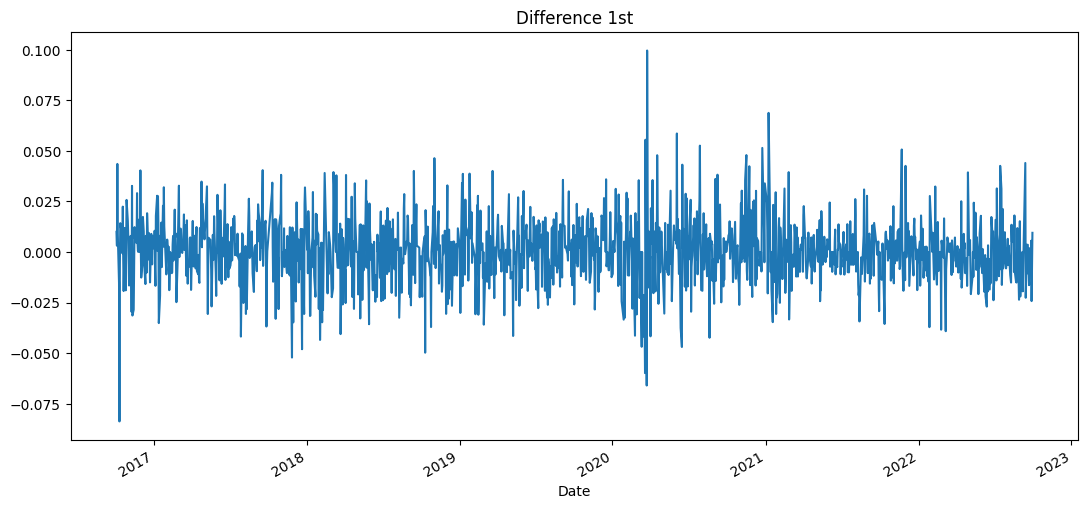

In [19]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')
augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.836178e+01
p-value                        2.226537e-30
#Lags Used                     1.500000e+01
Number of Observations Used    1.455000e+03
Critical Value (1%)           -3.434852e+00
Critical Value (5%)           -2.863528e+00
Critical Value (10%)          -2.567829e+00
dtype: float64


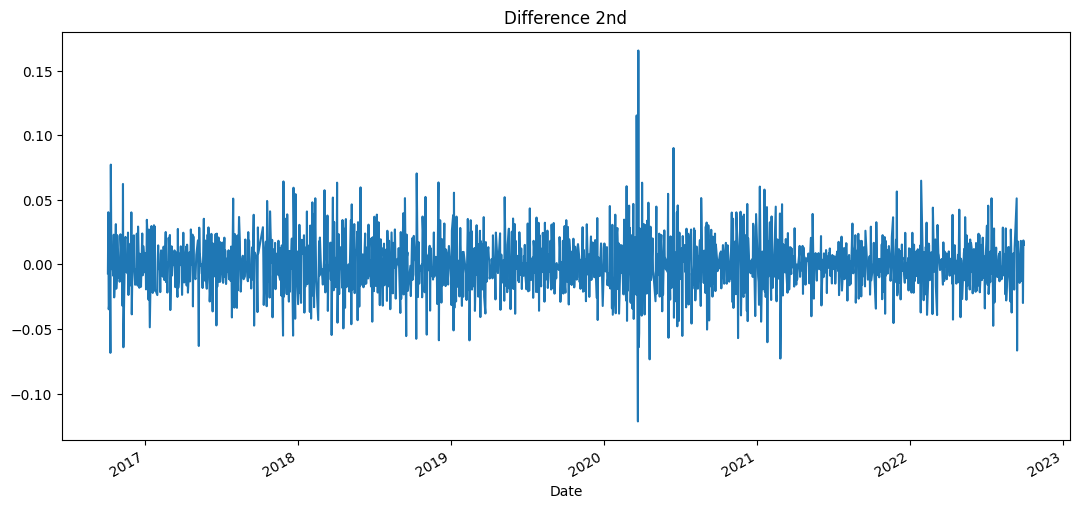

In [20]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [45]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1,0,0))
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1325
Model:                 ARIMA(1, 0, 0)   Log Likelihood                3555.849
Date:                Fri, 30 Sep 2022   AIC                          -7105.698
Time:                        17:02:23   BIC                          -7090.130
Sample:                             0   HQIC                         -7099.862
                               - 1325                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8787      0.116     93.672      0.000      10.651      11.106
ar.L1          0.9970      0.002    608.081      0.000       0.994       1.000
sigma2         0.0003   7.33e-06     37.129      0.0

C:\Users\mk\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mk\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mk\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\mk\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


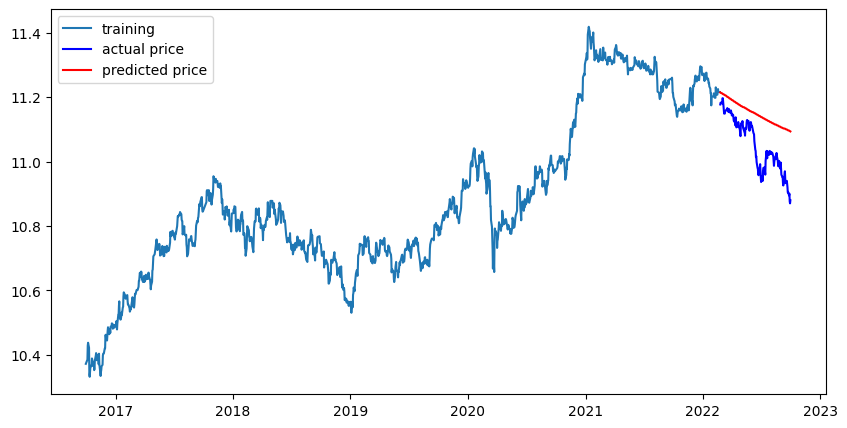

In [46]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  50414172.57919465
MAE:  6368.8795363799
RMSE:  7100.2938375249405
MAPE: 10.55%
